<center>
<h1 style="margin: 0; padding: 0;">
Sparsh Kaushik
</h1>
<h2 style="margin: 0; padding: 0;">
04317711621
</h2>
<h2 style="margin: 0; padding: 0;">
AIML-A
</h2>
</center>


In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split


In [10]:
datasize = 1000

ft1 = np.random.randn(datasize)
ft2 = np.random.randn(datasize)
ft3 = np.random.randn(datasize)

target = ft1 - 32 * ft2 + 21 * ft3 - 45 + np.random.normal(scale=0.1, size=datasize)

dataset = np.column_stack((ft1, ft2, ft3, target))

data_dict = {'feature1': ft1, 'feature2': ft2, 'feature3': ft3, 'tgt': target}

df = pd.DataFrame(data_dict)

In [11]:
X = df.drop('tgt', axis=1).to_numpy()
y = df['tgt'].to_numpy()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

In [12]:
from tqdm.keras import TqdmCallback

epochs = 2000
model_no_reg = Sequential()
model_no_reg.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_no_reg.add(Dense(32, activation='relu'))
model_no_reg.add(Dense(1))

# Compile the model
model_no_reg.compile(optimizer='Nadam', loss='mse')

# Train the model
history_no_reg = model_no_reg.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[TqdmCallback(epochs=2000, verbose=1)])

  0%|          | 0/2000 [00:00<?, ?epoch/s]

100%|██████████| 2000/2000 [00:42<00:00, 46.88epoch/s, loss=4.05, val_loss=32.2]    


In [13]:
model_l1 = Sequential()
model_l1.add(Dense(64, activation='relu', kernel_regularizer=l1(l1=0.005), input_shape=(X_train.shape[1],)))
model_l1.add(Dense(32, activation='relu', kernel_regularizer=l1(l1=0.005)))
model_l1.add(Dense(1))

model_l1.compile(optimizer='Nadam', loss='mse')

history_l1 = model_l1.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[TqdmCallback(epochs=2000, verbose=1)])

  0%|          | 0/2000 [00:00<?, ?epoch/s]

100%|██████████| 2000/2000 [00:42<00:00, 46.52epoch/s, loss=4.83, val_loss=38]      


In [14]:
model_l2 = Sequential()
model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2(l2=0.005), input_shape=(X_train.shape[1],)))
model_l2.add(Dense(32, activation='relu', kernel_regularizer=l2(l2=0.005)))
model_l2.add(Dense(1))

model_l2.compile(optimizer='Nadam', loss='mse')

history_l2 = model_l2.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[TqdmCallback(epochs=2000, verbose=1)])


  0%|          | 0/2000 [00:00<?, ?epoch/s]

100%|██████████| 2000/2000 [00:43<00:00, 46.42epoch/s, loss=3.26, val_loss=19.3]    


In [15]:
loss_no_reg = model_no_reg.evaluate(X_test, y_test)
loss_l1 = model_l1.evaluate(X_test, y_test)
loss_l2 = model_l2.evaluate(X_test, y_test)
print("Test Loss (No Regularization):", loss_no_reg)
print("Test Loss (L1 Regularization):", loss_l1)
print("Test Loss (L2 Regularization):", loss_l2)

1/1 [==============================] - 0s 14ms/step - loss: 74.6654
Test Loss (No Regularization): 94.64341735839844
Test Loss (L1 Regularization): 74.51881408691406
Test Loss (L2 Regularization): 74.66543579101562


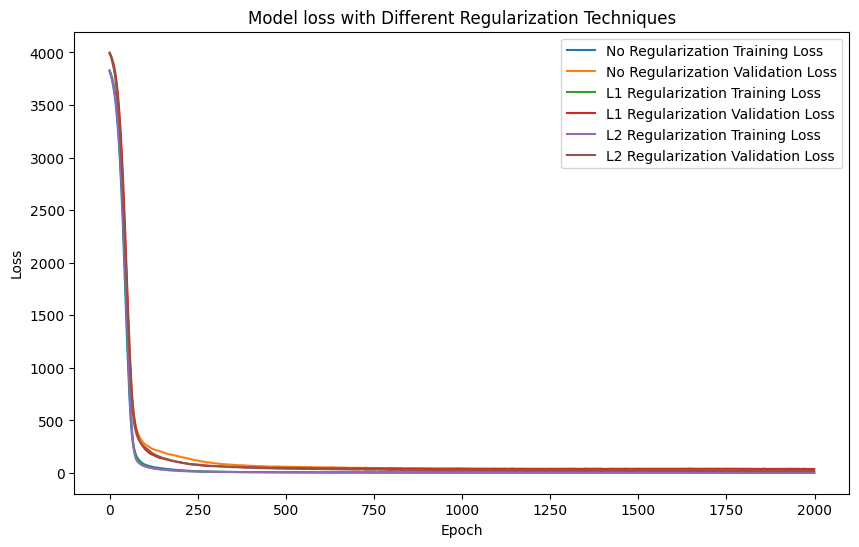

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(history_no_reg.history['loss'], label='No Regularization Training Loss')
plt.plot(history_no_reg.history['val_loss'], label='No Regularization Validation Loss')
plt.plot(history_l1.history['loss'], label='L1 Regularization Training Loss')
plt.plot(history_l1.history['val_loss'], label='L1 Regularization Validation Loss')
plt.plot(history_l2.history['loss'], label='L2 Regularization Training Loss')
plt.plot(history_l2.history['val_loss'], label='L2 Regularization Validation Loss')
plt.title('Model loss with Different Regularization Techniques')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()